In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,cohen_kappa_score, f1_score,accuracy_score,roc_curve,classification_report,recall_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [2]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
data=pd.read_csv(r"C:\Users\hp\Downloads\train(1).csv")

In [5]:
data

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0,after 2015,0,0,37379,11000,0,0,0,0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1,before 2015,1,0,10238,9000,0,0,0,1,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1,before 2015,1,1,10238,12000,0,0,0,1,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1,before 2015,0,1,92099,6000,1,0,0,1,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1,after 2015,1,1,32122,15000,0,0,1,0,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87280,519523,26-39,male,0-9y,none,upper class,0.564162,1,before 2015,1,1,30026,13000,0,0,0,1,Sedan
87281,220017,40-64,male,10-19y,high school,upper class,0.628189,1,before 2015,1,1,10238,7000,0,0,0,0,HatchBack
87282,465121,40-64,female,0-9y,university,working class,0.672934,1,before 2015,0,1,10238,7000,2,0,0,1,HatchBack
87283,602975,16-25,male,30y+,high school,poverty,0.630619,1,before 2015,1,0,33347,12000,0,0,0,0,Sports Car


In [6]:
data['OUTCOME'].value_counts(normalize=True)

0    0.577041
1    0.422959
Name: OUTCOME, dtype: float64

In [7]:
data.shape

(87285, 18)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,87285.0,394798.841554,279746.732730,101.000000,156345.000000,353756.000000,598618.000,999976.000000
CREDIT_SCORE,87285.0,0.602053,0.137898,0.074401,0.514841,0.600938,0.703,0.954075
VEHICLE_OWNERSHIP,87285.0,0.827760,0.377591,0.000000,1.000000,1.000000,1.000,1.000000
MARRIED,87285.0,0.584969,0.492730,0.000000,0.000000,1.000000,1.000,1.000000
CHILDREN,87285.0,0.519746,0.499613,0.000000,0.000000,1.000000,1.000,1.000000
POSTAL_CODE,87285.0,18036.278192,16724.517018,10238.000000,10238.000000,10238.000000,22320.000,92101.000000
ANNUAL_MILEAGE,87285.0,11056.424357,2977.057974,2000.000000,9000.000000,11000.000000,13000.000,21000.000000
SPEEDING_VIOLATIONS,87285.0,0.679395,1.388733,0.000000,0.000000,0.000000,1.000,20.000000
DUIS,87285.0,0.129633,0.589598,0.000000,0.000000,0.000000,0.000,6.000000
PAST_ACCIDENTS,87285.0,0.546417,1.397537,0.000000,0.000000,0.000000,0.000,15.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87285 entries, 0 to 87284
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87285 non-null  int64  
 1   AGE                  87285 non-null  object 
 2   GENDER               87285 non-null  object 
 3   DRIVING_EXPERIENCE   87285 non-null  object 
 4   EDUCATION            87285 non-null  object 
 5   INCOME               87285 non-null  object 
 6   CREDIT_SCORE         87285 non-null  float64
 7   VEHICLE_OWNERSHIP    87285 non-null  int64  
 8   VEHICLE_YEAR         87285 non-null  object 
 9   MARRIED              87285 non-null  int64  
 10  CHILDREN             87285 non-null  int64  
 11  POSTAL_CODE          87285 non-null  int64  
 12  ANNUAL_MILEAGE       87285 non-null  int64  
 13  SPEEDING_VIOLATIONS  87285 non-null  int64  
 14  DUIS                 87285 non-null  int64  
 15  PAST_ACCIDENTS       87285 non-null 

In [10]:
num=data.select_dtypes(include=np.number)

In [11]:
num.columns

Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [12]:
cat=data.select_dtypes(include=object)

In [13]:
cat

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,TYPE_OF_VEHICLE
0,40-64,female,20-29y,university,middle class,after 2015,Sports Car
1,26-39,male,20-29y,high school,middle class,before 2015,HatchBack
2,40-64,male,20-29y,none,middle class,before 2015,Sedan
3,40-64,male,20-29y,high school,upper class,before 2015,Sedan
4,40-64,female,20-29y,none,working class,after 2015,Sedan
...,...,...,...,...,...,...,...
87280,26-39,male,0-9y,none,upper class,before 2015,Sedan
87281,40-64,male,10-19y,high school,upper class,before 2015,HatchBack
87282,40-64,female,0-9y,university,working class,before 2015,HatchBack
87283,16-25,male,30y+,high school,poverty,before 2015,Sports Car


In [14]:
for i in ['VEHICLE_OWNERSHIP','MARRIED', 'CHILDREN', 'OUTCOME']:
    data[i]=data[i].astype(object)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87285 entries, 0 to 87284
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87285 non-null  int64  
 1   AGE                  87285 non-null  object 
 2   GENDER               87285 non-null  object 
 3   DRIVING_EXPERIENCE   87285 non-null  object 
 4   EDUCATION            87285 non-null  object 
 5   INCOME               87285 non-null  object 
 6   CREDIT_SCORE         87285 non-null  float64
 7   VEHICLE_OWNERSHIP    87285 non-null  object 
 8   VEHICLE_YEAR         87285 non-null  object 
 9   MARRIED              87285 non-null  object 
 10  CHILDREN             87285 non-null  object 
 11  POSTAL_CODE          87285 non-null  int64  
 12  ANNUAL_MILEAGE       87285 non-null  int64  
 13  SPEEDING_VIOLATIONS  87285 non-null  int64  
 14  DUIS                 87285 non-null  int64  
 15  PAST_ACCIDENTS       87285 non-null 

In [16]:
number=data.select_dtypes(include=np.number)

In [17]:
cate=data.select_dtypes(include=object)

In [18]:
cate

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,OUTCOME,TYPE_OF_VEHICLE
0,40-64,female,20-29y,university,middle class,0,after 2015,0,0,0,Sports Car
1,26-39,male,20-29y,high school,middle class,1,before 2015,1,0,1,HatchBack
2,40-64,male,20-29y,none,middle class,1,before 2015,1,1,1,Sedan
3,40-64,male,20-29y,high school,upper class,1,before 2015,0,1,1,Sedan
4,40-64,female,20-29y,none,working class,1,after 2015,1,1,0,Sedan
...,...,...,...,...,...,...,...,...,...,...,...
87280,26-39,male,0-9y,none,upper class,1,before 2015,1,1,1,Sedan
87281,40-64,male,10-19y,high school,upper class,1,before 2015,1,1,0,HatchBack
87282,40-64,female,0-9y,university,working class,1,before 2015,0,1,1,HatchBack
87283,16-25,male,30y+,high school,poverty,1,before 2015,1,0,0,Sports Car


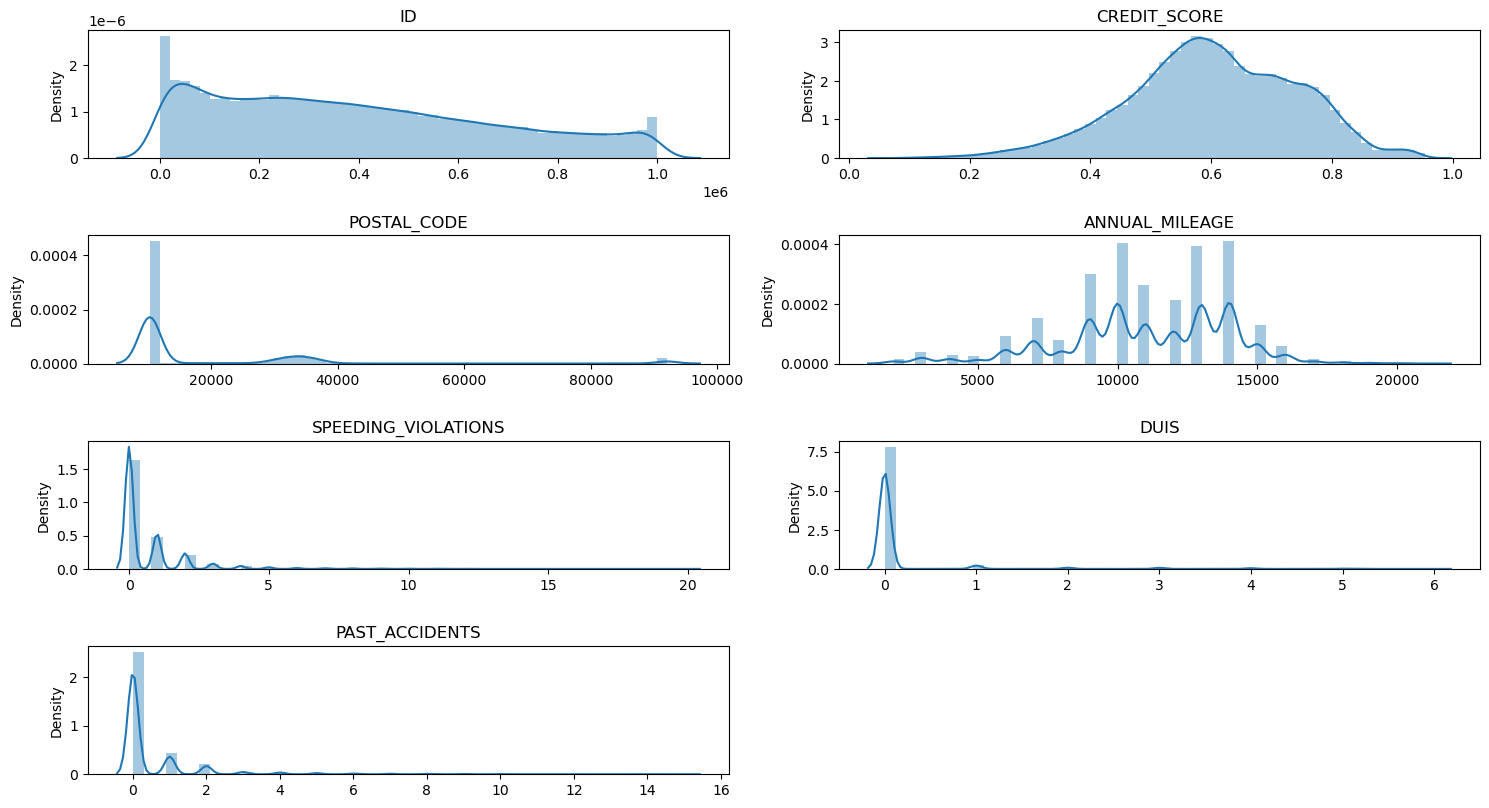

In [19]:
plt.figure(figsize=(15,10))
c=1
for i in number:
    plt.subplot(5,2,c)
    sns.distplot(x=data[i])
    c=c+1
    plt.title(i)
plt.tight_layout()

In [20]:
# Most of the clients applying for the insurance claim have 0 past Accidents history.
# Most of the clients applying for the claim have no DUIS
# Most of the clients have 0 speeding violation history
# Credit score data is nearly uniform.
# ID is not useful column will be dropped before the model building.

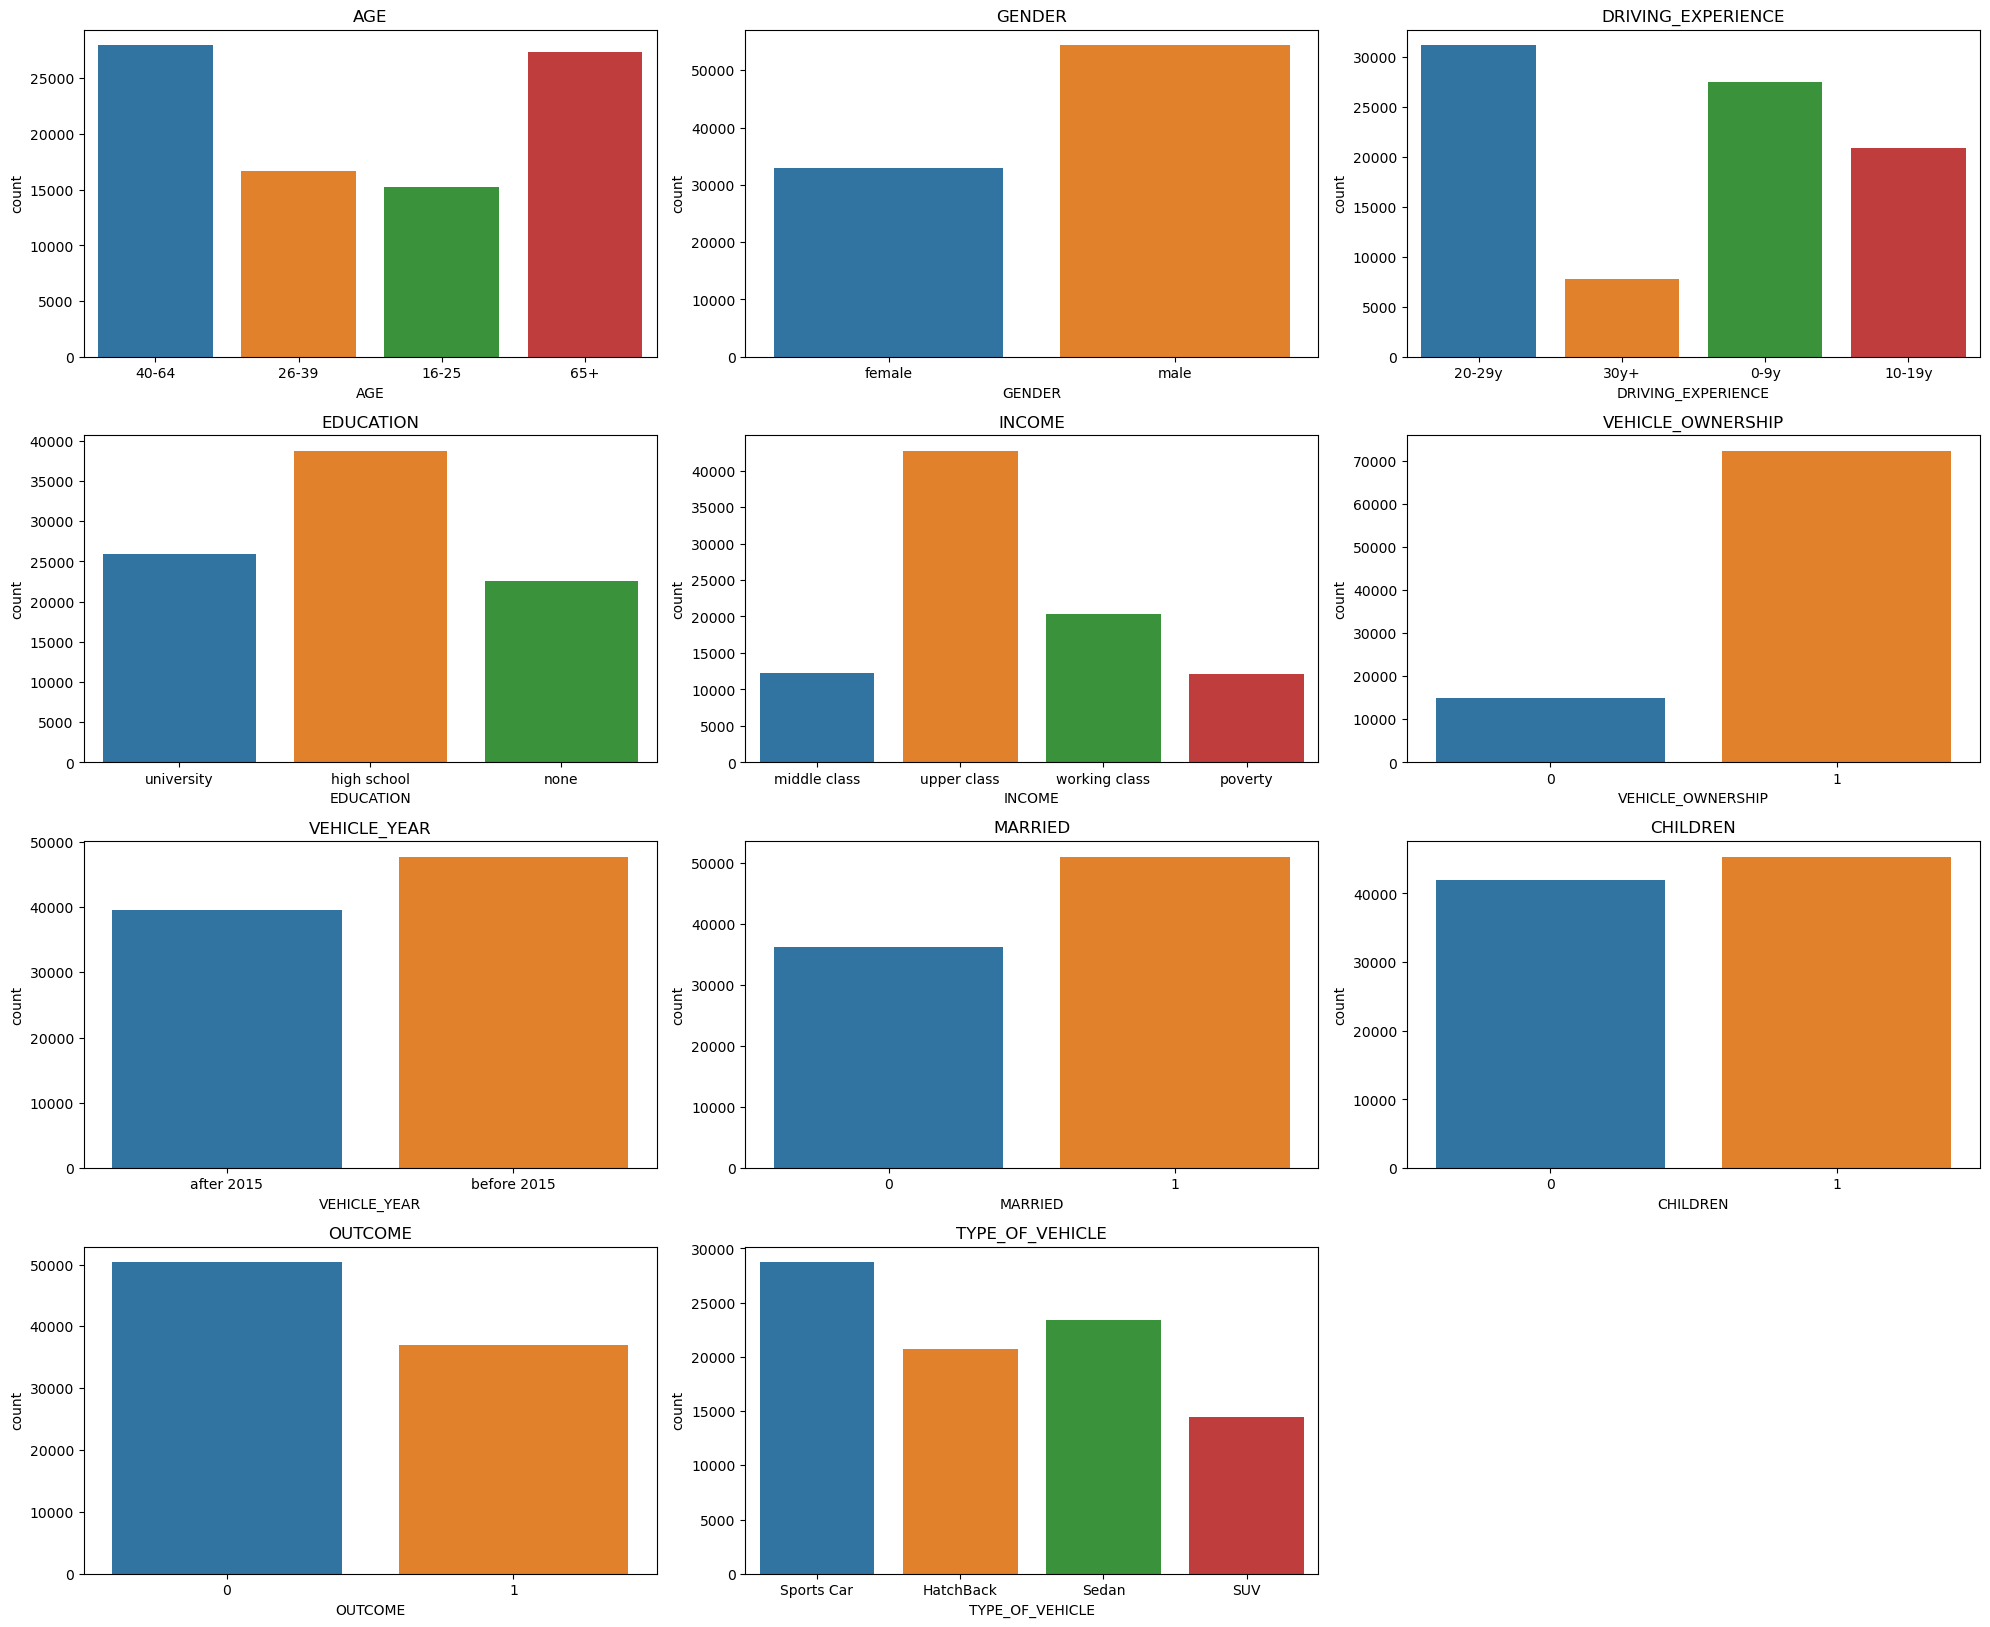

In [21]:
plt.figure(figsize=(20,20))
c=1
for i in cate:
    plt.subplot(5,3,c)
    sns.countplot(x=data[i])
    c=c+1
    plt.title(i)
plt.tight_layout()

In [22]:
# Male gender has high count.
# Most of the clients own the vehicle.
# most of clients vehicle year belongs to before 2015
# Most of the clients claims are accepted 
# Most of the claims have sports cars
# majority of the clients are married.
# Majority of the clients belong to the upper class.
# Majority of the clients have 20-29 yrs of the experience of driving, while the claimers having experience more than 30 yrs
# of driving is least.
# Majority of the clients have education of high school
# Age of claimers is in between 40-64 is equal to the count of the claimers aged more than 65 yrs whereas the age of the claimers
# 26-39 is equal to the count of the 16-25 aged claimers

In [23]:
for i in cate:
    v= data[i].value_counts(normalize=True)
    print(v)

40-64    0.320410
65+      0.313891
26-39    0.191064
16-25    0.174635
Name: AGE, dtype: float64
male      0.623005
female    0.376995
Name: GENDER, dtype: float64
20-29y    0.357117
0-9y      0.315335
10-19y    0.238804
30y+      0.088744
Name: DRIVING_EXPERIENCE, dtype: float64
high school    0.443902
university     0.297485
none           0.258613
Name: EDUCATION, dtype: float64
upper class      0.489030
working class    0.232296
middle class     0.139806
poverty          0.138867
Name: INCOME, dtype: float64
1    0.82776
0    0.17224
Name: VEHICLE_OWNERSHIP, dtype: float64
before 2015    0.546921
after 2015     0.453079
Name: VEHICLE_YEAR, dtype: float64
1    0.584969
0    0.415031
Name: MARRIED, dtype: float64
1    0.519746
0    0.480254
Name: CHILDREN, dtype: float64
0    0.577041
1    0.422959
Name: OUTCOME, dtype: float64
Sports Car    0.329071
Sedan         0.268202
HatchBack     0.237177
SUV           0.165550
Name: TYPE_OF_VEHICLE, dtype: float64


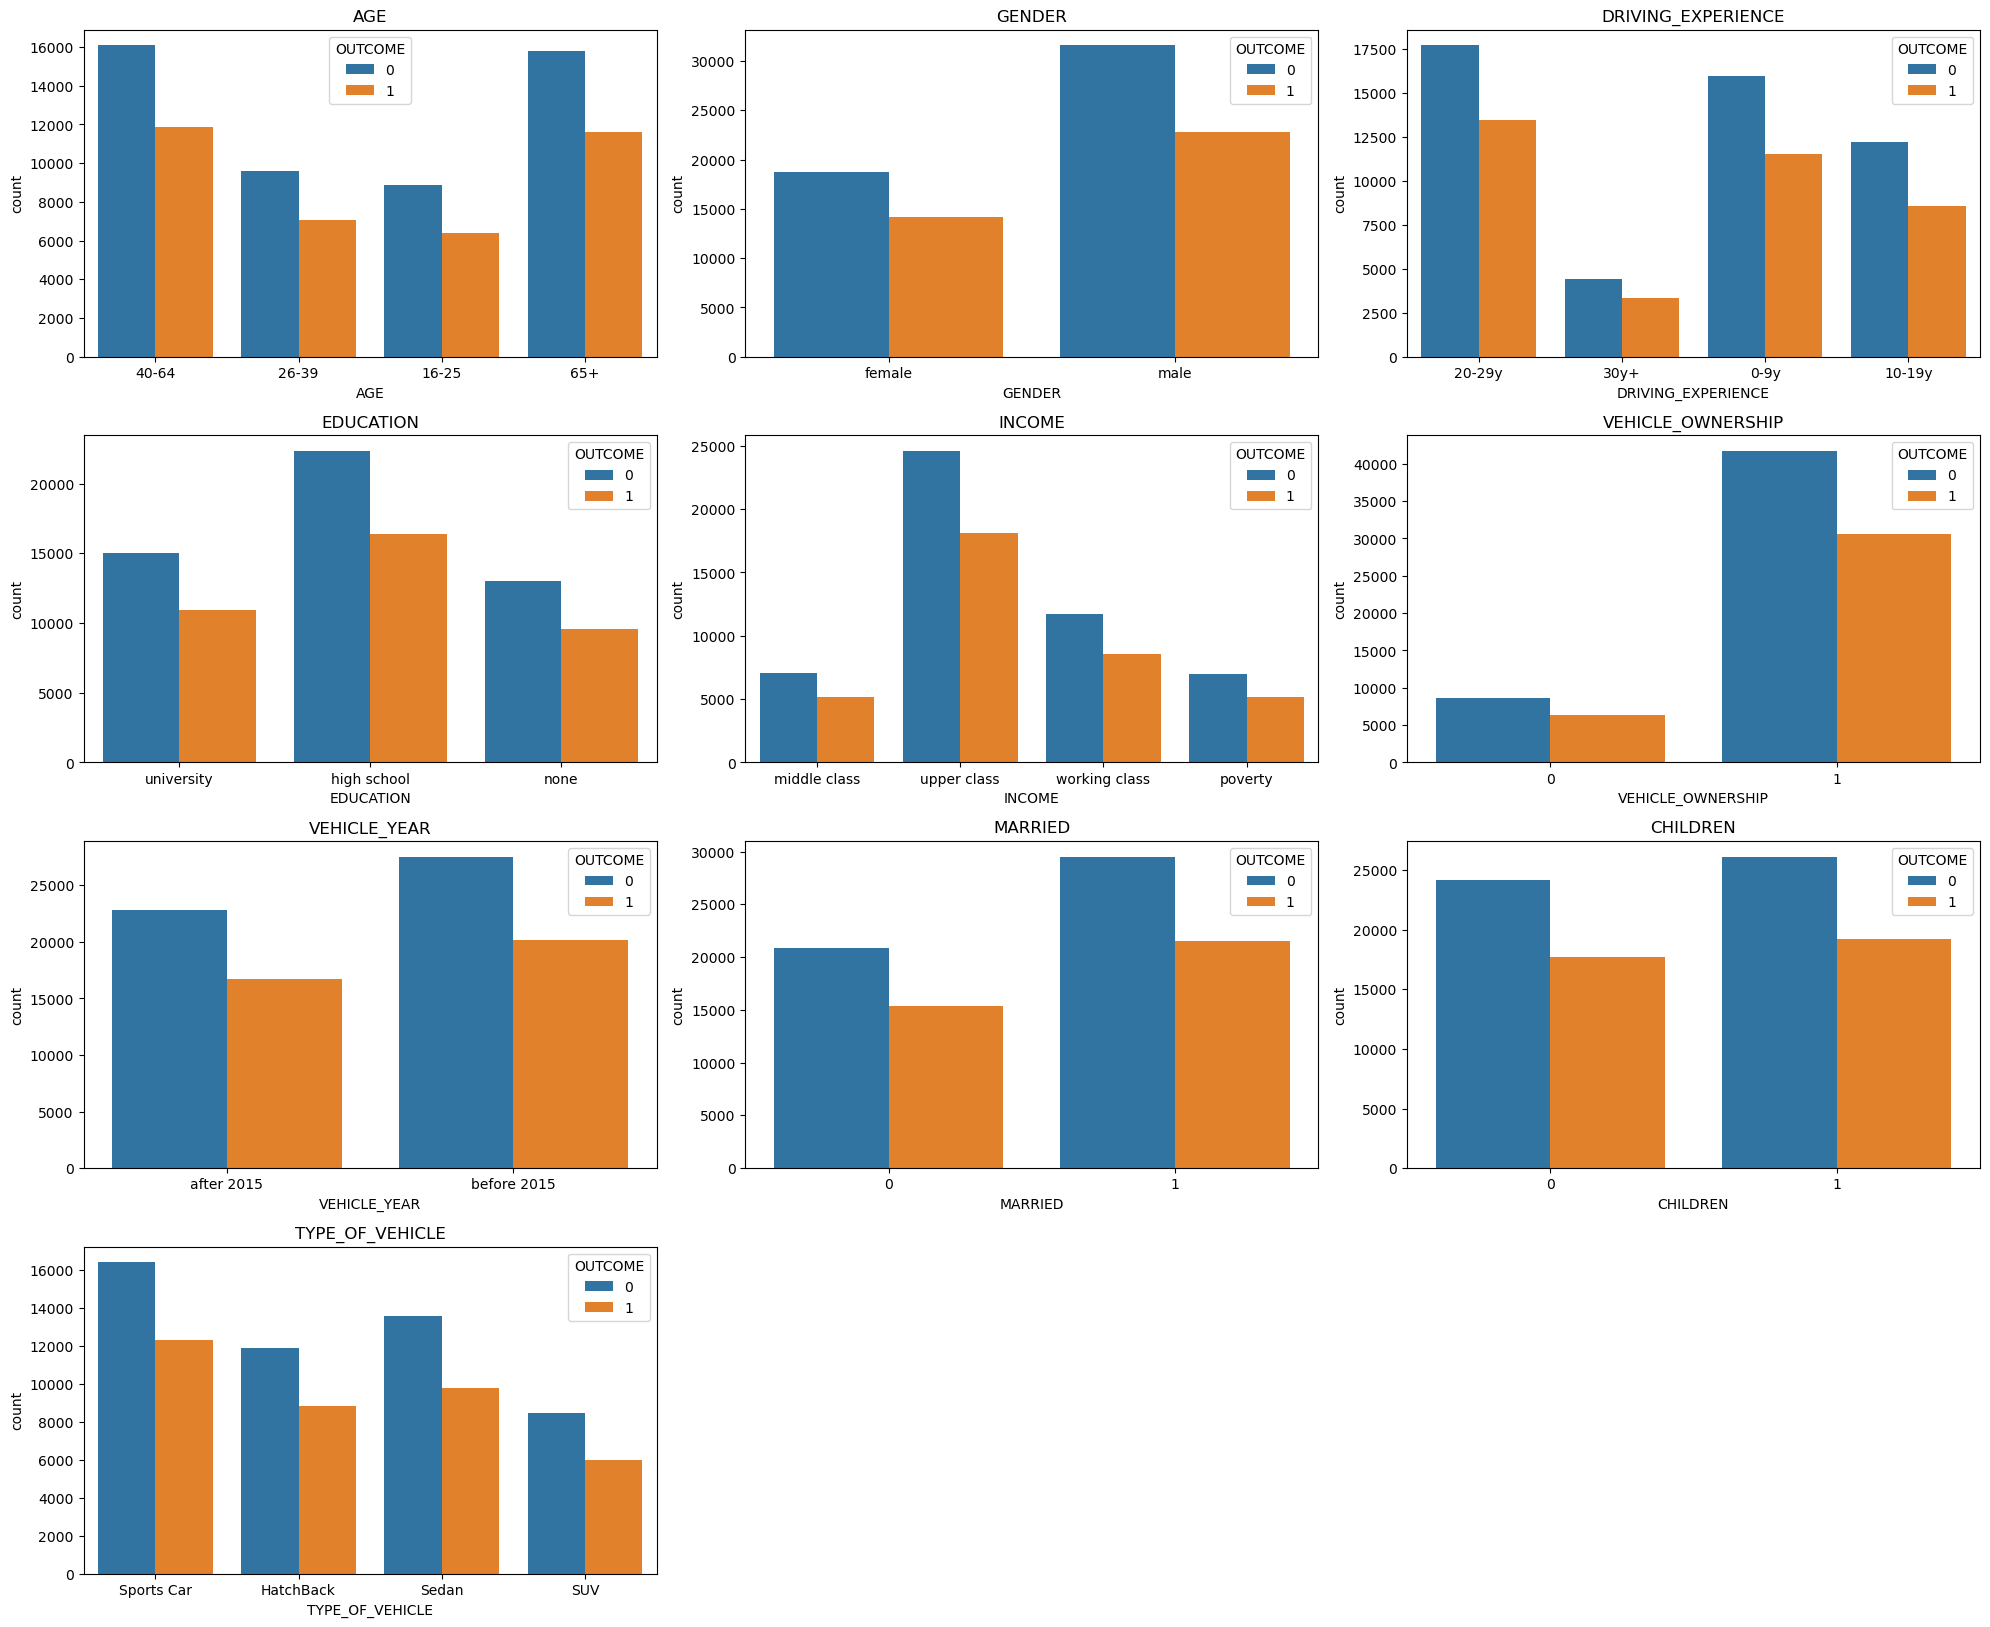

In [24]:
plt.figure(figsize=(20,20))
c=1
for i in cate:
    if i!='OUTCOME':
        plt.subplot(5,3,c)
        sns.countplot(x=data[i], hue=data['OUTCOME'])
        c=c+1
        plt.title(i)
plt.tight_layout()
    

In [25]:
for i in cate:
    v=data.groupby(i)['OUTCOME'].value_counts(normalize=True)*100
    print(v)

AGE    OUTCOME
16-25  0          58.144722
       1          41.855278
26-39  0          57.570306
       1          42.429694
40-64  0          57.532091
       1          42.467909
65+    0          57.715892
       1          42.284108
Name: OUTCOME, dtype: float64
GENDER  OUTCOME
female  0          57.019996
        1          42.980004
male    0          58.118024
        1          41.881976
Name: OUTCOME, dtype: float64
DRIVING_EXPERIENCE  OUTCOME
0-9y                0          58.058422
                    1          41.941578
10-19y              0          58.736327
                    1          41.263673
20-29y              0          56.860543
                    1          43.139457
30y+                0          57.061709
                    1          42.938291
Name: OUTCOME, dtype: float64
EDUCATION    OUTCOME
high school  0          57.683374
             1          42.316626
none         0          57.573207
             1          42.426793
university   0          57

In [26]:
list1=[]
for i in cate:
    _,p,_,_=stats.chi2_contingency(pd.crosstab(data[i],data.OUTCOME))
    print(i,p)
    if p<0.05:
        list1.append({i:p})
list1

AGE 0.6424044207742965
GENDER 0.0014970648535722767
DRIVING_EXPERIENCE 0.00010973177714173586
EDUCATION 0.8237366710850957
INCOME 0.6938684077604709
VEHICLE_OWNERSHIP 0.6405873352295235
VEHICLE_YEAR 0.9202929414132787
MARRIED 0.3706971968247399
CHILDREN 0.655529184252891
OUTCOME 0.0
TYPE_OF_VEHICLE 0.008876422780475835


[{'GENDER': 0.0014970648535722767},
 {'DRIVING_EXPERIENCE': 0.00010973177714173586},
 {'OUTCOME': 0.0},
 {'TYPE_OF_VEHICLE': 0.008876422780475835}]

In [27]:
# From above test it is clear that from categorical datatype we can have GENDER,DRIVING Experience, type of vehicle as predictors 
# which are impacting the target greatly.

In [28]:
data.columns

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE'],
      dtype='object')

In [29]:
number

,ID,CREDIT_SCORE,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,816393,0.638050,37379,11000,0,0,0
1,251762,0.475741,10238,9000,0,0,0
2,481952,0.839817,10238,12000,0,0,0
3,3506,0.682527,92099,6000,1,0,0
4,498013,0.572184,32122,15000,0,0,1
...,...,...,...,...,...,...,...
87280,519523,0.564162,30026,13000,0,0,0
87281,220017,0.628189,10238,7000,0,0,0
87282,465121,0.672934,10238,7000,2,0,0
87283,602975,0.630619,33347,12000,0,0,0


<AxesSubplot:>

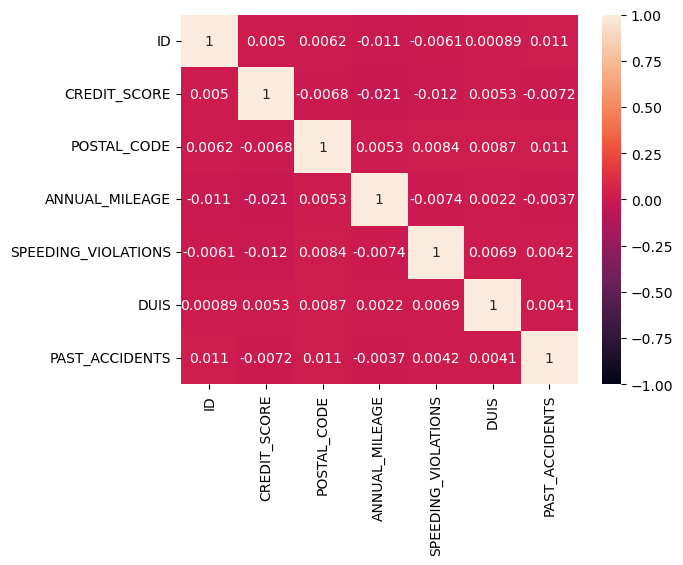

In [30]:
sns.heatmap(number.corr(),annot=True,vmin=-1,vmax=+1)

In [31]:
# There is no correlation among the numerical variables meaning no multicollinearity exist among the target variable.

In [32]:
data.columns

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE'],
      dtype='object')

In [33]:
data.groupby('INCOME')['CREDIT_SCORE'].median()

INCOME
middle class     0.602857
poverty          0.598567
upper class      0.600292
working class    0.602112
Name: CREDIT_SCORE, dtype: float64

<AxesSubplot:ylabel='OUTCOME'>

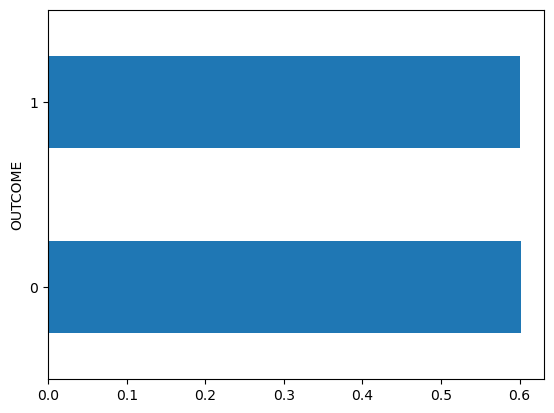

In [34]:
data.groupby('OUTCOME')['CREDIT_SCORE'].median().plot(kind='barh')

<AxesSubplot:ylabel='OUTCOME'>

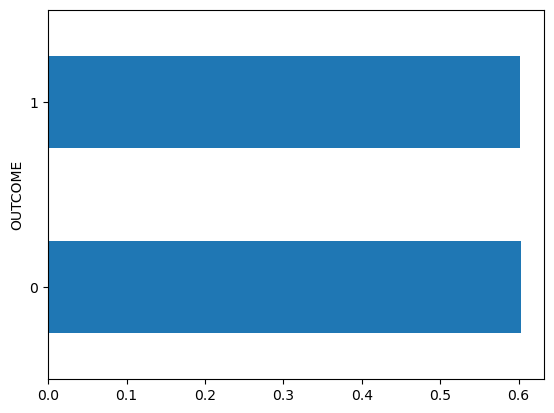

In [35]:
data.groupby('OUTCOME')['CREDIT_SCORE'].mean().plot(kind='barh')

In [36]:
# As credit score show no relation with the target hence dropped from the data.

In [37]:
data.columns

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE'],
      dtype='object')

In [38]:
number.columns

Index(['ID', 'CREDIT_SCORE', 'POSTAL_CODE', 'ANNUAL_MILEAGE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')

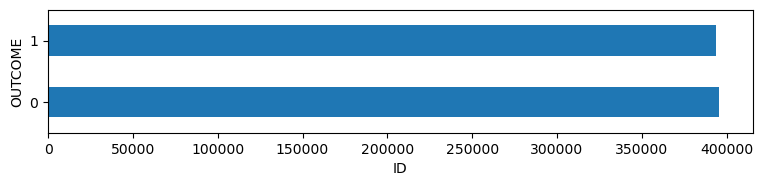

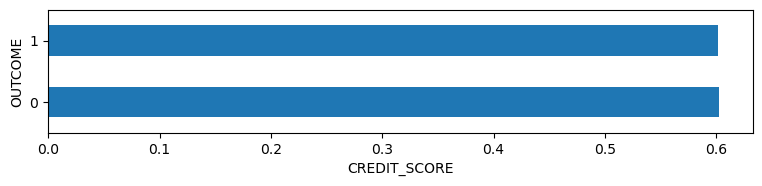

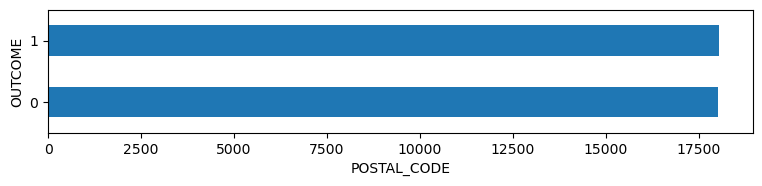

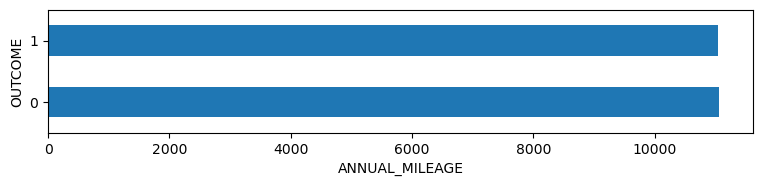

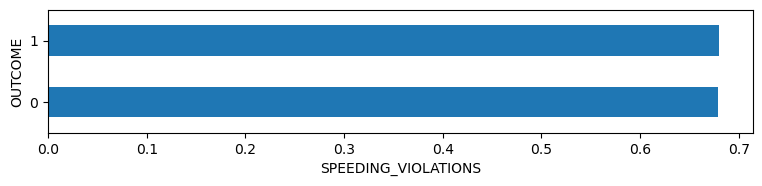

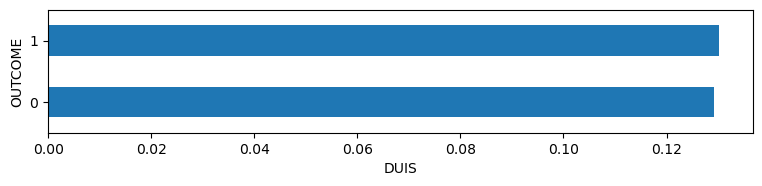

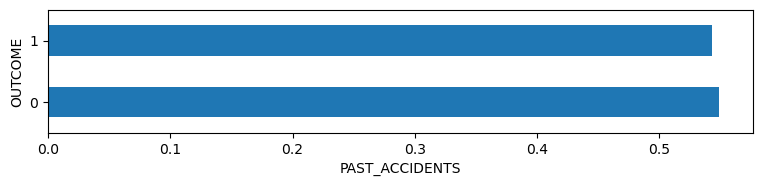

In [39]:
a=8
b=2
c=1
for i in number:
    plt.figure(figsize=[20,15])
    plt.subplot(a,b,c)
    data.groupby('OUTCOME')[i].mean().plot(kind='barh')
    plt.xlabel(i)
    c=c+1
plt.show()



In [40]:
for i in number:
    v=data.groupby('OUTCOME')[i].mean()
    print(v)

OUTCOME
0    395654.034546
1    393632.107021
Name: ID, dtype: float64
OUTCOME
0    0.602548
1    0.601377
Name: CREDIT_SCORE, dtype: float64
OUTCOME
0    18027.048524
1    18048.870172
Name: POSTAL_CODE, dtype: float64
OUTCOME
0    11064.625648
1    11045.235387
Name: ANNUAL_MILEAGE, dtype: float64
OUTCOME
0    0.678857
1    0.680129
Name: SPEEDING_VIOLATIONS, dtype: float64
OUTCOME
0    0.129212
1    0.130207
Name: DUIS, dtype: float64
OUTCOME
0    0.548851
1    0.543096
Name: PAST_ACCIDENTS, dtype: float64


In [41]:
# from above it is clear that mean for outcome for above mentioned variable is almost same ,so these columns aren't
# affecting  target much.

In [42]:
import statsmodels.api as sma
from statsmodels.formula.api import ols

In [43]:
data['OUTCOME']=data['OUTCOME'].astype(object)

In [44]:
list3=[]
for i in number:
    _,p=stats.pearsonr(data[i], data['OUTCOME'])
    print(i,p)
    if p<0.05:
        list3.append([i,p])
print(list3)

ID 0.2914607982356572
CREDIT_SCORE 0.2153794252121662
POSTAL_CODE 0.8489662741773423
ANNUAL_MILEAGE 0.34178716427576844
SPEEDING_VIOLATIONS 0.8936717445117716
DUIS 0.8052683237049476
PAST_ACCIDENTS 0.5477513539217604
[]


In [45]:
# From pearson test and above realtion study it is clear that none of the numerical column cause much effect on the target
# in prediction.

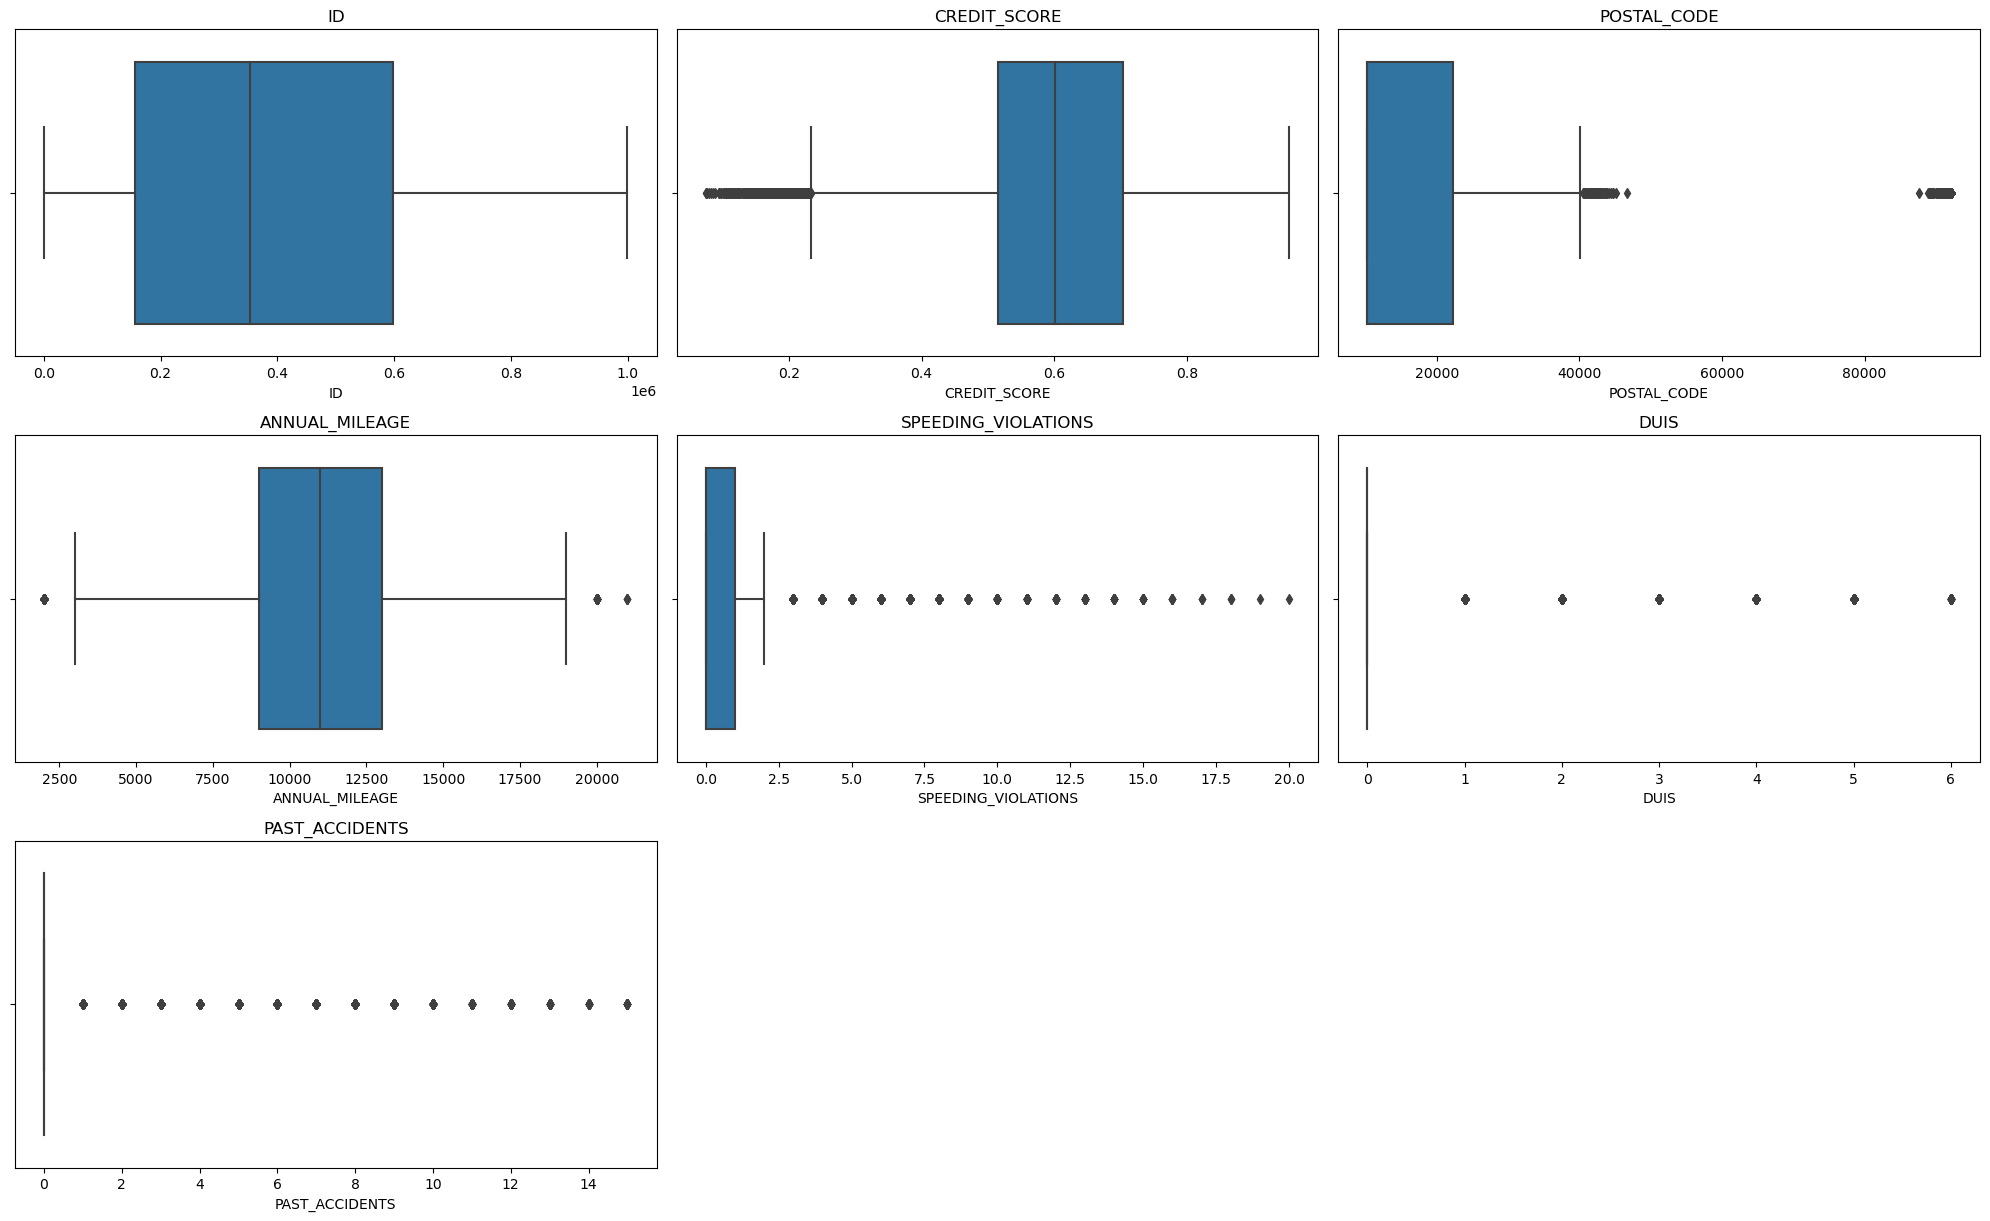

In [46]:
plt.figure(figsize=(20,20))
c=1
for i in number:
    plt.subplot(5,3,c)
    sns.boxplot(x=data[i])
    c=c+1
    plt.title(i)
plt.tight_layout()

In [47]:
# Doesn't required to treat the outliers because data is realistic

In [48]:
data.columns

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE'],
      dtype='object')

In [49]:
data.groupby('DRIVING_EXPERIENCE')['SPEEDING_VIOLATIONS'].mean()

DRIVING_EXPERIENCE
0-9y      0.685910
10-19y    0.684130
20-29y    0.675917
30y+      0.657501
Name: SPEEDING_VIOLATIONS, dtype: float64

In [50]:
data.groupby('DRIVING_EXPERIENCE')['DUIS'].mean()

DRIVING_EXPERIENCE
0-9y      0.126944
10-19y    0.134187
20-29y    0.128549
30y+      0.131294
Name: DUIS, dtype: float64

In [51]:
data.groupby('DRIVING_EXPERIENCE')['PAST_ACCIDENTS'].mean()

DRIVING_EXPERIENCE
0-9y      0.558058
10-19y    0.549894
20-29y    0.534375
30y+      0.544152
Name: PAST_ACCIDENTS, dtype: float64

In [52]:
data2=data.copy()

In [53]:
data2.columns

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE'],
      dtype='object')

In [54]:
x=data2[['GENDER', 'DRIVING_EXPERIENCE','TYPE_OF_VEHICLE']]
y=data2[ 'OUTCOME'].astype(int)

In [55]:
# Label encoding
x.loc[x['GENDER']=='female','GENDER']=1
x.loc[x['GENDER']=='male','GENDER']=0

In [56]:
x['GENDER']=x['GENDER'].astype(int)

In [57]:
x

,GENDER,DRIVING_EXPERIENCE,TYPE_OF_VEHICLE
0,1,20-29y,Sports Car
1,0,20-29y,HatchBack
2,0,20-29y,Sedan
3,0,20-29y,Sedan
4,1,20-29y,Sedan
...,...,...,...
87280,0,0-9y,Sedan
87281,0,10-19y,HatchBack
87282,1,0-9y,HatchBack
87283,0,30y+,Sports Car


In [58]:
for i in ['DRIVING_EXPERIENCE', 'TYPE_OF_VEHICLE']:
        x[i]=x[i].map(x[i].value_counts(normalize=True).to_dict())

In [59]:
x

,GENDER,DRIVING_EXPERIENCE,TYPE_OF_VEHICLE
0,1,0.357117,0.329071
1,0,0.357117,0.237177
2,0,0.357117,0.268202
3,0,0.357117,0.268202
4,1,0.357117,0.268202
...,...,...,...
87280,0,0.315335,0.268202
87281,0,0.238804,0.237177
87282,1,0.315335,0.237177
87283,0,0.088744,0.329071


In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [61]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20, stratify=y,random_state=0)

In [62]:
X_train=sma.add_constant(x_train)
X_test=sma.add_constant(x_test)

In [63]:
model=sma.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.681143
         Iterations 4


In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                OUTCOME   No. Observations:                69828
Model:                          Logit   Df Residuals:                    69824
Method:                           MLE   Df Model:                            3
Date:                Wed, 28 Dec 2022   Pseudo R-squ.:               0.0001237
Time:                        15:13:05   Log-Likelihood:                -47563.
converged:                       True   LL-Null:                       -47569.
Covariance Type:            nonrobust   LLR p-value:                  0.008237
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4320      0.047     -9.152      0.000      -0.525      -0.339
GENDER                 0.0389      0.016      2.463      0.014       0.008       0.070
DRIVING_EXPERIENCE     0.0967      0.099      0.977      0.328      -0.097       0.290
TYPE_OF_VEHICLE        0.2972      0.136      2.184      0.029       0.030       0.564
======================================================================================
"""

In [65]:
pred=model.predict(X_test)

In [66]:
predt=[0 if i<0.41 else 1 for i in pred]

In [67]:
def score(acc,pred):
    print('confusion_matrix \n',confusion_matrix(acc,pred))
    print('cohen_kappa_score',cohen_kappa_score(acc,pred))
    print('accuracy',accuracy_score(acc,pred))
    print('recall',recall_score(acc,pred))
    print('auc_score',roc_auc_score(acc,pred))
    print('classification_report \n',classification_report(acc,pred))
    print('f1_score',f1_score(acc,pred))
def roc(actual,pred_prob):
    fpr,tpr,thres = roc_curve(actual,pred_prob)
    plt.plot(fpr,tpr,color='r')
    plt.plot([0,1],[0,1],ls='--',color='b')
    plt.xlabel('FPR AUC: %.2f'%roc_auc_score(actual,pred_prob))
    plt.ylabel('TPR')
    plt.show()

In [68]:
score(y_test,predt)

confusion_matrix 
 [[  88 9985]
 [  70 7314]]
cohen_kappa_score -0.0006306938546212226
accuracy 0.42401328979778885
recall 0.9905200433369448
auc_score 0.49962813444520227
classification_report 
               precision    recall  f1-score   support

           0       0.56      0.01      0.02     10073
           1       0.42      0.99      0.59      7384

    accuracy                           0.42     17457
   macro avg       0.49      0.50      0.30     17457
weighted avg       0.50      0.42      0.26     17457

f1_score 0.5926346068144067


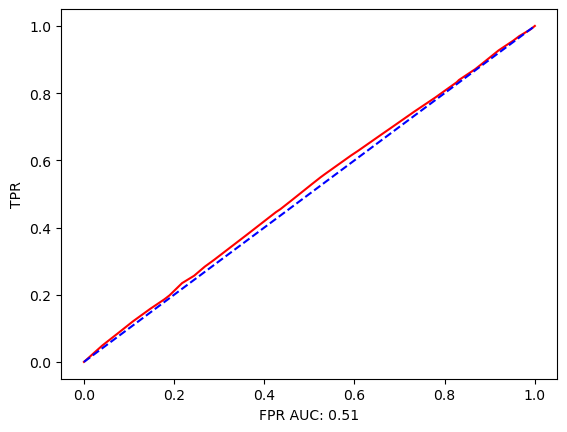

In [69]:
roc(y_test,pred)

In [70]:
model1=sma.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.681143
         Iterations 4


In [71]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                OUTCOME   No. Observations:                69828
Model:                          Logit   Df Residuals:                    69824
Method:                           MLE   Df Model:                            3
Date:                Wed, 28 Dec 2022   Pseudo R-squ.:               0.0001237
Time:                        15:13:06   Log-Likelihood:                -47563.
converged:                       True   LL-Null:                       -47569.
Covariance Type:            nonrobust   LLR p-value:                  0.008237
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4320      0.047     -9.152      0.000      -0.525      -0.339
GENDER                 0.0389      0.016      2.463      0.014       0.008       0.070
DRIVING_EXPERIENCE     0.0967      0.099      0.977      0.328      -0.097       0.290
TYPE_OF_VEHICLE        0.2972      0.136      2.184      0.029       0.030       0.564
======================================================================================
"""

In [72]:
pred=model1.predict(X_test)

In [73]:
predm=[0 if i<0.422 else 1 for i in pred]

In [74]:
score(y_test,predm)

confusion_matrix 
 [[4691 5382]
 [3257 4127]]
cohen_kappa_score 0.023701133671382157
accuracy 0.5051268831987168
recall 0.558911159263272
auc_score 0.5123057732184522
classification_report 
               precision    recall  f1-score   support

           0       0.59      0.47      0.52     10073
           1       0.43      0.56      0.49      7384

    accuracy                           0.51     17457
   macro avg       0.51      0.51      0.50     17457
weighted avg       0.52      0.51      0.51     17457

f1_score 0.48860474752856214


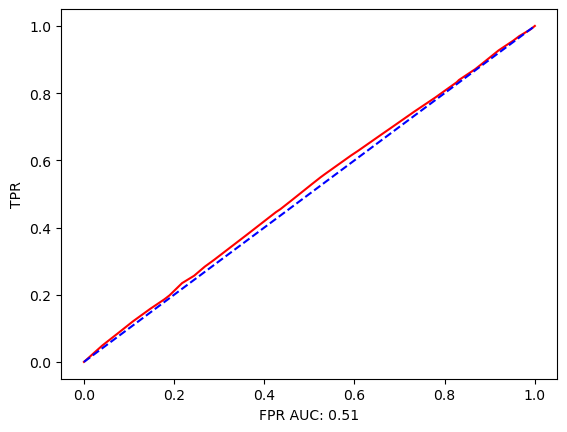

In [75]:
roc(y_test,pred)

In [76]:
fpr,tpr,thres=roc_curve(y_test,pred)

In [77]:
dataframe=pd.DataFrame({'fpr':fpr,'tpr':tpr,'thres':thres,'Youden_index':tpr-fpr})

In [78]:
dataframe.sort_values('Youden_index',ascending=False)

,fpr,tpr,thres,Youden_index
16,0.524968,0.549702,0.422279,0.024734
17,0.534300,0.558911,0.422128,0.024612
15,0.504716,0.528304,0.422837,0.023589
18,0.592673,0.614707,0.421214,0.022034
19,0.607763,0.628115,0.420475,0.020352
14,0.458255,0.478467,0.423264,0.020212
12,0.425792,0.445829,0.424643,0.020037
13,0.435421,0.454361,0.424379,0.018939
11,0.360766,0.377979,0.425630,0.017213
20,0.660776,0.677817,0.420230,0.017041


In [79]:
predg=[0 if i<0.42 else 1 for i in pred] # taking the threshold according to the youden's index.

In [80]:
score(y_test,predg)

confusion_matrix 
 [[3417 6656]
 [2379 5005]]
cohen_kappa_score 0.015817665858805285
accuracy 0.48244257317981326
recall 0.6778169014084507
auc_score 0.5085202843188387
classification_report 
               precision    recall  f1-score   support

           0       0.59      0.34      0.43     10073
           1       0.43      0.68      0.53      7384

    accuracy                           0.48     17457
   macro avg       0.51      0.51      0.48     17457
weighted avg       0.52      0.48      0.47     17457

f1_score 0.5255972696245734


In [81]:
lr=LogisticRegression(class_weight='balanced',solver='lbfgs',max_iter=100, random_state=0)

In [82]:
fit=lr.fit(x_train,y_train)

In [83]:
pred=fit.predict(x_test)

In [84]:
score(y_test,pred)

confusion_matrix 
 [[5457 4616]
 [3851 3533]]
cohen_kappa_score 0.019936525076801104
accuracy 0.5149796643180387
recall 0.47846695557963165
auc_score 0.510106107592258
classification_report 
               precision    recall  f1-score   support

           0       0.59      0.54      0.56     10073
           1       0.43      0.48      0.45      7384

    accuracy                           0.51     17457
   macro avg       0.51      0.51      0.51     17457
weighted avg       0.52      0.51      0.52     17457

f1_score 0.45490246571814846


In [85]:
params={'class_weight':[{0:1,1:neg_weigh} for neg_weigh in np.arange(1.0,3.0,0.5)],
                      'solver':['lbfgs','saga','sag','liblinear'],'max_iter':[100,200,300]}

In [86]:
gscv=GridSearchCV(estimator=LogisticRegression(),param_grid=params,scoring='f1',verbose=3)

In [87]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END class_weight={0: 1, 1: 1.0}, max_iter=100, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 2/5] END class_weight={0: 1, 1: 1.0}, max_iter=100, solver=lbfgs;, score=0.000 total time=   0.1s
[CV 3/5] END class_weight={0: 1, 1: 1.0}, max_iter=100, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 4/5] END class_weight={0: 1, 1: 1.0}, max_iter=100, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 5/5] END class_weight={0: 1, 1: 1.0}, max_iter=100, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/5] END class_weight={0: 1, 1: 1.0}, max_iter=100, solver=saga;, score=0.000 total time=   0.3s
[CV 2/5] END class_weight={0: 1, 1: 1.0}, max_iter=100, solver=saga;, score=0.000 total time=   0.3s
[CV 3/5] END class_weight={0: 1, 1: 1.0}, max_iter=100, solver=saga;, score=0.000 total time=   0.2s
[CV 4/5] END class_weight={0: 1, 1: 1.0}, max_iter=100, solver=saga;, score=0.000 total time=   0.3s
[CV 5/5] END class_weigh

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'class_weight': [{0: 1, 1: 1.0}, {0: 1, 1: 1.5},
                                          {0: 1, 1: 2.0}, {0: 1, 1: 2.5}],
                         'max_iter': [100, 200, 300],
                         'solver': ['lbfgs', 'saga', 'sag', 'liblinear']},
             scoring='f1', verbose=3)

In [88]:
gscv.best_params_

{'class_weight': {0: 1, 1: 1.5}, 'max_iter': 100, 'solver': 'lbfgs'}

In [89]:
lr=LogisticRegression(**gscv.best_params_)

In [90]:
predl=lr.fit(x_train,y_train).predict(x_test)

In [91]:
score(y_test,predl)

confusion_matrix 
 [[    0 10073]
 [    0  7384]]
cohen_kappa_score 0.0
accuracy 0.4229821847969296
recall 1.0
auc_score 0.5
classification_report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     10073
           1       0.42      1.00      0.59      7384

    accuracy                           0.42     17457
   macro avg       0.21      0.50      0.30     17457
weighted avg       0.18      0.42      0.25     17457

f1_score 0.5945010265287227


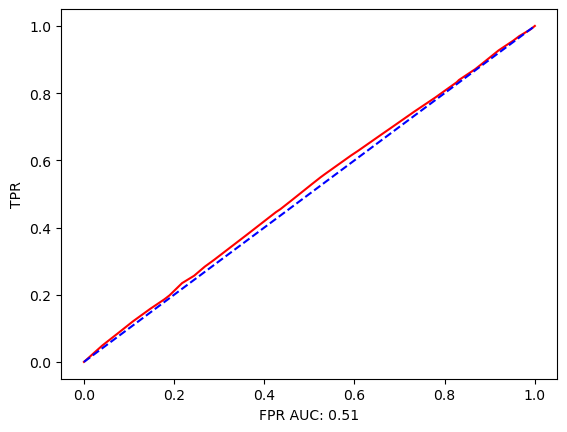

In [92]:
roc(y_test,fit.predict_proba(x_test)[:,1])

In [93]:
train2=data[['GENDER', 'DRIVING_EXPERIENCE', 'VEHICLE_YEAR',
        'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'TYPE_OF_VEHICLE']]

In [94]:
train2[['GENDER', 'DRIVING_EXPERIENCE','TYPE_OF_VEHICLE']]=x

In [95]:
train2['VEHICLE_YEAR']=pd.get_dummies(train2['VEHICLE_YEAR'], drop_first=True)

In [96]:
sc=StandardScaler()

In [97]:
for i in[[ 'ANNUAL_MILEAGE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']]:
    train2.loc[:,i]=sc.fit_transform(pd.DataFrame(train2.loc[:,i]))

In [98]:
train2

,GENDER,DRIVING_EXPERIENCE,VEHICLE_YEAR,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,1,0.357117,0,-0.018953,-0.489222,-0.219868,-0.390988,0.329071
1,0,0.357117,1,-0.690761,-0.489222,-0.219868,-0.390988,0.237177
2,0,0.357117,1,0.316951,-0.489222,-0.219868,-0.390988,0.268202
3,0,0.357117,1,-1.698473,0.230863,-0.219868,-0.390988,0.268202
4,1,0.357117,0,1.324663,-0.489222,-0.219868,0.324561,0.268202
...,...,...,...,...,...,...,...,...
87280,0,0.315335,1,0.652855,-0.489222,-0.219868,-0.390988,0.268202
87281,0,0.238804,1,-1.362569,-0.489222,-0.219868,-0.390988,0.237177
87282,1,0.315335,1,-1.362569,0.950948,-0.219868,-0.390988,0.237177
87283,0,0.088744,1,0.316951,-0.489222,-0.219868,-0.390988,0.329071


In [99]:
x_train_2,x_test2,y_train_2,ytest_2=train_test_split(train2,y,test_size=0.20, stratify=y,random_state=0)

In [100]:
predlr_full=lr.fit(x_train_2,y_train_2).predict(x_test2)

In [101]:
score(y_test,predlr_full)

confusion_matrix 
 [[    7 10066]
 [    6  7378]]
cohen_kappa_score -9.95396127956294e-05
accuracy 0.4230394684080884
recall 0.9991874322860238
auc_score 0.4999411796593427
classification_report 
               precision    recall  f1-score   support

           0       0.54      0.00      0.00     10073
           1       0.42      1.00      0.59      7384

    accuracy                           0.42     17457
   macro avg       0.48      0.50      0.30     17457
weighted avg       0.49      0.42      0.25     17457

f1_score 0.5943289834058321


In [102]:
# The difference between lr model above the train2 dataset is that it contains 
# ['GENDER', 'DRIVING_EXPERIENCE','TYPE_OF_VEHICLE'] columns in predictor variable giving same output.meaning y=the variables
# VEHICLE_YEAR ,ANNUAL_MILEAGE, sPEEDING_VIOLATIONS,DUIS ,PAST_ACCIDENTS doesn't cause impact on target. so in further model with different
# models we go with just 3 variables['GENDER', 'DRIVING_EXPERIENCE','TYPE_OF_VEHICLE'].

In [103]:
# Decsion tree

In [104]:
dtree=DecisionTreeClassifier( criterion='entropy')

In [105]:
pred=dtree.fit(x_train,y_train).predict(x_test)

In [106]:
score(y_test,pred)

confusion_matrix 
 [[10073     0]
 [ 7384     0]]
cohen_kappa_score 0.0
accuracy 0.5770178152030704
recall 0.0
auc_score 0.5
classification_report 
               precision    recall  f1-score   support

           0       0.58      1.00      0.73     10073
           1       0.00      0.00      0.00      7384

    accuracy                           0.58     17457
   macro avg       0.29      0.50      0.37     17457
weighted avg       0.33      0.58      0.42     17457

f1_score 0.0


In [107]:
params={'criterion':['gini', 'entropy'],
'max_depth': [5, 15, 25, 35, None],
'max_features': ['auto', 'log2', None],
'min_samples_split': [2, 9],
'min_samples_leaf': [1, 8],
'class_weight':[{0:1,1:neg_weight} for neg_weight in np.arange(1.0,5.0,0.5)]}

In [108]:
gscv=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params,scoring='f1',verbose=3)

In [109]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
[CV 1/5] END class_weight={0: 1, 1: 1.0}, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.000 total time=   0.0s
[CV 2/5] END class_weight={0: 1, 1: 1.0}, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.000 total time=   0.0s
[CV 3/5] END class_weight={0: 1, 1: 1.0}, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.000 total time=   0.0s
[CV 4/5] END class_weight={0: 1, 1: 1.0}, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.000 total time=   0.0s
[CV 5/5] END class_weight={0: 1, 1: 1.0}, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.000 total time=   0.0s
[CV 1/5] END class_weight={0: 1, 1: 1.0}, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1.0}, {0: 1, 1: 1.5},
                                          {0: 1, 1: 2.0}, {0: 1, 1: 2.5},
                                          {0: 1, 1: 3.0}, {0: 1, 1: 3.5},
                                          {0: 1, 1: 4.0}, {0: 1, 1: 4.5}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 15, 25, 35, None],
                         'max_features': ['auto', 'log2', None],
                         'min_samples_leaf': [1, 8],
                         'min_samples_split': [2, 9]},
             scoring='f1', verbose=3)

In [110]:
gscv.best_params_

{'class_weight': {0: 1, 1: 2.0},
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [111]:
dtree_=DecisionTreeClassifier(**gscv.best_params_)

In [112]:
model_dt=dtree_.fit(x_train,y_train)

In [113]:
pred=model_dt.predict(x_test)

In [114]:
score(y_test,pred)

confusion_matrix 
 [[    0 10073]
 [    0  7384]]
cohen_kappa_score 0.0
accuracy 0.4229821847969296
recall 1.0
auc_score 0.5
classification_report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     10073
           1       0.42      1.00      0.59      7384

    accuracy                           0.42     17457
   macro avg       0.21      0.50      0.30     17457
weighted avg       0.18      0.42      0.25     17457

f1_score 0.5945010265287227


In [115]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [116]:
b_rf=BalancedRandomForestClassifier()

In [117]:
pred=b_rf.fit(x_train,y_train).predict(x_test)

In [118]:
score(y_test,pred)

confusion_matrix 
 [[4829 5244]
 [3526 3858]]
cohen_kappa_score 0.001824749488136379
accuracy 0.49762273013690783
recall 0.5224810400866738
auc_score 0.5009407086663886
classification_report 
               precision    recall  f1-score   support

           0       0.58      0.48      0.52     10073
           1       0.42      0.52      0.47      7384

    accuracy                           0.50     17457
   macro avg       0.50      0.50      0.50     17457
weighted avg       0.51      0.50      0.50     17457

f1_score 0.4680334829552347


In [119]:
params={'criterion':['gini', 'entropy'],
'n_estimators':[100,300,500,800,900],
'class_weight':[{0:1,1:neg_weight} for neg_weight in np.arange(1.0,5.0,0.5)]}

In [120]:
b_rf1=BalancedRandomForestClassifier(n_estimators=100,criterion='entropy', class_weight={0:2,1:2})

In [121]:
pred=b_rf1.fit(x_train,y_train).predict(x_test)

In [122]:
score(y_test,pred)

confusion_matrix 
 [[4648 5425]
 [3403 3981]]
cohen_kappa_score 0.0005501208072453689
accuracy 0.49430028068969467
recall 0.5391386782231853
auc_score 0.5002851139552341
classification_report 
               precision    recall  f1-score   support

           0       0.58      0.46      0.51     10073
           1       0.42      0.54      0.47      7384

    accuracy                           0.49     17457
   macro avg       0.50      0.50      0.49     17457
weighted avg       0.51      0.49      0.50     17457

f1_score 0.47421083978558665


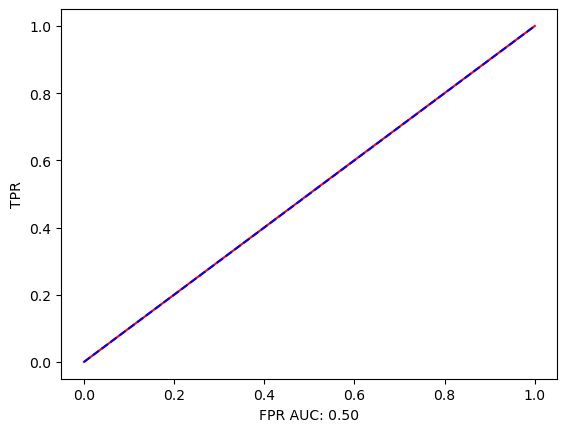

In [123]:
roc(y_test,pred)

In [124]:
rf=RandomForestClassifier(n_estimators=100)

In [125]:
pred=rf.fit(x_train,y_train).predict(x_test)

In [126]:
score(y_test,pred)

confusion_matrix 
 [[10073     0]
 [ 7384     0]]
cohen_kappa_score 0.0
accuracy 0.5770178152030704
recall 0.0
auc_score 0.5
classification_report 
               precision    recall  f1-score   support

           0       0.58      1.00      0.73     10073
           1       0.00      0.00      0.00      7384

    accuracy                           0.58     17457
   macro avg       0.29      0.50      0.37     17457
weighted avg       0.33      0.58      0.42     17457

f1_score 0.0


In [127]:
params={'criterion': ['gini', 'entropy'],
'n estimators': [100, 200, 300],
'max depth': [5, 15, 25, None],
'max features': ['auto', 'log2', None]}

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=300;, score=0.000 total time=   4.6s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=300;, score=0.000 total time=   4.5s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=300;, score=0.000 total time=   4.4s
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=600;, score=0.000 total time=   9.2s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=600;, score=0.000 total time=   9.0s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=600;, score=0.000 total time=   9.3s
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=900;, score=0.000 total time=  13.8s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=900;, score=0.000 total time=  13.8s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=900;, score=0.000 total time=  13.3s
[CV 1/3] END criterion=entropy, max_depth=5, n_estimators=300;, score=0.000 total ti

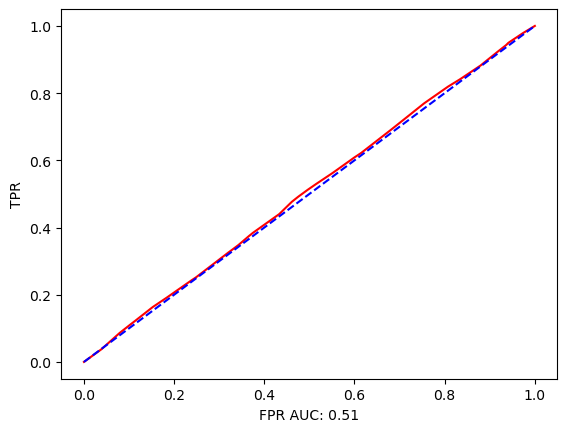

In [128]:
params = {'n_estimators':[300,600,900],'max_depth':[4,5,6,7],'criterion':['entropy']}
gscv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,
                   scoring='f1',verbose=3,cv=3)
gscv.fit(x_train,y_train)
rf=RandomForestClassifier(**gscv.best_params_)
model_rf=rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)
score(y_test,y_pred_rf)
roc(y_test,model_rf.predict_proba(x_test)[:,1])

In [129]:
# Acc to our problem statetment it is necessary for the model to consider false negative as well as false positive of the data
# so far logit model performs good by balancing both false positive and false negative.

confusion_matrix 
 [[10073     0]
 [ 7384     0]]
cohen_kappa_score 0.0
accuracy 0.5770178152030704
recall 0.0
auc_score 0.5
classification_report 
               precision    recall  f1-score   support

           0       0.58      1.00      0.73     10073
           1       0.00      0.00      0.00      7384

    accuracy                           0.58     17457
   macro avg       0.29      0.50      0.37     17457
weighted avg       0.33      0.58      0.42     17457

f1_score 0.0


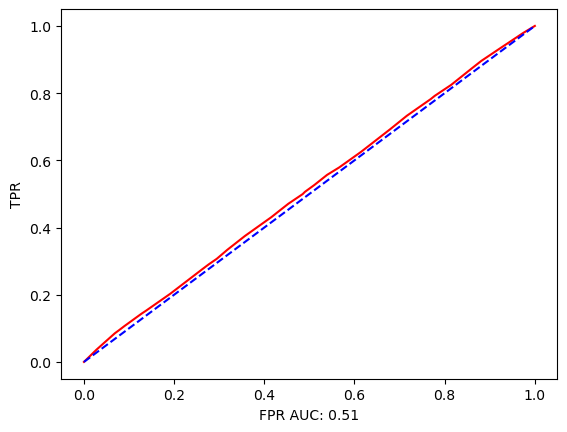

In [130]:
ab=AdaBoostClassifier()
model_ab=ab.fit(x_train,y_train)
y_pred_ab=model_ab.predict(x_test)
score(y_test,y_pred_ab)
roc(y_test,model_ab.predict_proba(x_test)[:,1])

In [131]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [132]:
pred=model.fit(x_train,y_train).predict(x_test)

In [133]:
score(y_test,pred)

confusion_matrix 
 [[10073     0]
 [ 7384     0]]
cohen_kappa_score 0.0
accuracy 0.5770178152030704
recall 0.0
auc_score 0.5
classification_report 
               precision    recall  f1-score   support

           0       0.58      1.00      0.73     10073
           1       0.00      0.00      0.00      7384

    accuracy                           0.58     17457
   macro avg       0.29      0.50      0.37     17457
weighted avg       0.33      0.58      0.42     17457

f1_score 0.0


In [134]:
s=SMOTE()
x_train_s,y_train_s=s.fit_resample(x_train,y_train)

In [135]:
lr1=LogisticRegression()

In [136]:
pred=lr1.fit(x_train_s,y_train_s).predict(x_test)

In [137]:
score(y_test,pred)

confusion_matrix 
 [[5363 4710]
 [3783 3601]]
cohen_kappa_score 0.019758352696485848
accuracy 0.5134902904279086
recall 0.4876760563380282
auc_score 0.5100447193235857
classification_report 
               precision    recall  f1-score   support

           0       0.59      0.53      0.56     10073
           1       0.43      0.49      0.46      7384

    accuracy                           0.51     17457
   macro avg       0.51      0.51      0.51     17457
weighted avg       0.52      0.51      0.52     17457

f1_score 0.4588722523096528


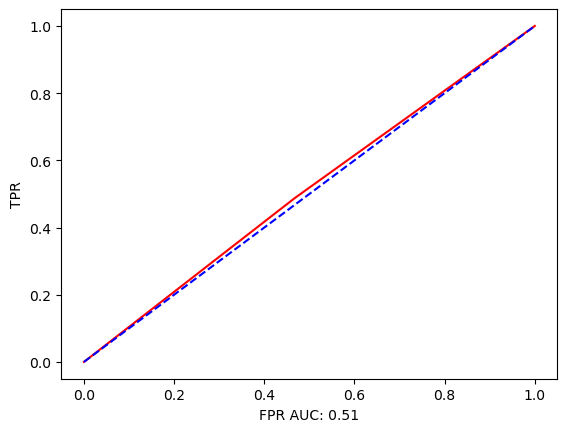

In [138]:
roc(y_test,pred)

In [139]:
model=CatBoostClassifier()

In [140]:
pred=model.fit(x_train,y_train).predict(x_test)

Learning rate set to 0.063144
0:	learn: 0.6916863	total: 204ms	remaining: 3m 23s
1:	learn: 0.6903733	total: 222ms	remaining: 1m 50s
2:	learn: 0.6892297	total: 240ms	remaining: 1m 19s
3:	learn: 0.6882091	total: 255ms	remaining: 1m 3s
4:	learn: 0.6873345	total: 266ms	remaining: 53s
5:	learn: 0.6865535	total: 281ms	remaining: 46.6s
6:	learn: 0.6858809	total: 292ms	remaining: 41.5s
7:	learn: 0.6852673	total: 309ms	remaining: 38.4s
8:	learn: 0.6847264	total: 327ms	remaining: 36s
9:	learn: 0.6842669	total: 338ms	remaining: 33.4s
10:	learn: 0.6838451	total: 354ms	remaining: 31.9s
11:	learn: 0.6834909	total: 368ms	remaining: 30.3s
12:	learn: 0.6831810	total: 380ms	remaining: 28.8s
13:	learn: 0.6829039	total: 393ms	remaining: 27.6s
14:	learn: 0.6826688	total: 409ms	remaining: 26.8s
15:	learn: 0.6824426	total: 431ms	remaining: 26.5s
16:	learn: 0.6822560	total: 447ms	remaining: 25.8s
17:	learn: 0.6820794	total: 465ms	remaining: 25.4s
18:	learn: 0.6819293	total: 478ms	remaining: 24.7s
19:	learn: 0

In [141]:
score(y_test,pred)

confusion_matrix 
 [[10073     0]
 [ 7384     0]]
cohen_kappa_score 0.0
accuracy 0.5770178152030704
recall 0.0
auc_score 0.5
classification_report 
               precision    recall  f1-score   support

           0       0.58      1.00      0.73     10073
           1       0.00      0.00      0.00      7384

    accuracy                           0.58     17457
   macro avg       0.29      0.50      0.37     17457
weighted avg       0.33      0.58      0.42     17457

f1_score 0.0


In [142]:
test=pd.read_csv(r"C:\Users\hp\Downloads\test(1).csv")

In [143]:
test

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,303713,16-25,male,10-19y,high school,middle class,0.424958,1,before 2015,1,0,10238,13000,0,0,0,Sports Car
1,141107,16-25,male,20-29y,high school,working class,0.503478,0,before 2015,1,1,10238,14000,0,0,0,SUV
2,447316,26-39,female,20-29y,high school,upper class,0.252246,1,before 2015,1,0,10238,10000,0,0,0,HatchBack
3,196066,16-25,female,20-29y,university,middle class,0.464749,1,before 2015,1,1,10238,7000,0,1,0,SUV
4,179947,16-25,male,20-29y,high school,working class,0.452968,1,after 2015,0,1,10238,13000,1,0,0,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17710,19557,65+,female,0-9y,high school,upper class,0.672255,1,before 2015,0,0,31885,9000,2,0,0,SUV
17711,222459,40-64,female,0-9y,none,working class,0.514193,1,after 2015,1,0,32277,10000,0,0,0,Sedan
17712,83089,16-25,male,10-19y,none,upper class,0.461942,1,after 2015,1,0,34800,11000,0,0,0,Sedan
17713,984879,40-64,female,20-29y,high school,working class,0.483571,1,before 2015,0,0,10238,10000,0,0,0,HatchBack


In [144]:
test1=test.copy()

In [145]:
test1

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,303713,16-25,male,10-19y,high school,middle class,0.424958,1,before 2015,1,0,10238,13000,0,0,0,Sports Car
1,141107,16-25,male,20-29y,high school,working class,0.503478,0,before 2015,1,1,10238,14000,0,0,0,SUV
2,447316,26-39,female,20-29y,high school,upper class,0.252246,1,before 2015,1,0,10238,10000,0,0,0,HatchBack
3,196066,16-25,female,20-29y,university,middle class,0.464749,1,before 2015,1,1,10238,7000,0,1,0,SUV
4,179947,16-25,male,20-29y,high school,working class,0.452968,1,after 2015,0,1,10238,13000,1,0,0,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17710,19557,65+,female,0-9y,high school,upper class,0.672255,1,before 2015,0,0,31885,9000,2,0,0,SUV
17711,222459,40-64,female,0-9y,none,working class,0.514193,1,after 2015,1,0,32277,10000,0,0,0,Sedan
17712,83089,16-25,male,10-19y,none,upper class,0.461942,1,after 2015,1,0,34800,11000,0,0,0,Sedan
17713,984879,40-64,female,20-29y,high school,working class,0.483571,1,before 2015,0,0,10238,10000,0,0,0,HatchBack


In [146]:
test1.columns

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'TYPE_OF_VEHICLE'],
      dtype='object')

In [147]:
test_set=test1[['GENDER', 'DRIVING_EXPERIENCE','TYPE_OF_VEHICLE']]

In [148]:
test_set

,GENDER,DRIVING_EXPERIENCE,TYPE_OF_VEHICLE
0,male,10-19y,Sports Car
1,male,20-29y,SUV
2,female,20-29y,HatchBack
3,female,20-29y,SUV
4,male,20-29y,SUV
...,...,...,...
17710,female,0-9y,SUV
17711,female,0-9y,Sedan
17712,male,10-19y,Sedan
17713,female,20-29y,HatchBack


In [149]:
# label encoding
test_set.loc[test_set['GENDER']=='female','GENDER']=1
test_set.loc[test_set['GENDER']=='male','GENDER']=0

In [150]:
test_set

,GENDER,DRIVING_EXPERIENCE,TYPE_OF_VEHICLE
0,0,10-19y,Sports Car
1,0,20-29y,SUV
2,1,20-29y,HatchBack
3,1,20-29y,SUV
4,0,20-29y,SUV
...,...,...,...
17710,1,0-9y,SUV
17711,1,0-9y,Sedan
17712,0,10-19y,Sedan
17713,1,20-29y,HatchBack


In [151]:
for i in ['DRIVING_EXPERIENCE', 'TYPE_OF_VEHICLE']:
        test_set[i]=test_set[i].map(test_set[i].value_counts(normalize=True).to_dict())

In [152]:
test_set

,GENDER,DRIVING_EXPERIENCE,TYPE_OF_VEHICLE
0,0,0.240305,0.331301
1,0,0.356873,0.165848
2,1,0.356873,0.236974
3,1,0.356873,0.165848
4,0,0.356873,0.165848
...,...,...,...
17710,1,0.315382,0.165848
17711,1,0.315382,0.265876
17712,0,0.240305,0.265876
17713,1,0.356873,0.236974


In [153]:
test_set_logit=sma.add_constant(test_set)

In [154]:
test_set_logit

,const,GENDER,DRIVING_EXPERIENCE,TYPE_OF_VEHICLE
0,1.0,0,0.240305,0.331301
1,1.0,0,0.356873,0.165848
2,1.0,1,0.356873,0.236974
3,1.0,1,0.356873,0.165848
4,1.0,0,0.356873,0.165848
...,...,...,...,...
17710,1.0,1,0.315382,0.165848
17711,1.0,1,0.315382,0.265876
17712,1.0,0,0.240305,0.265876
17713,1.0,1,0.356873,0.236974


In [155]:
b_rf=BalancedRandomForestClassifier()

In [156]:
y_pred=b_rf.fit(x,y).predict(test_set)

In [157]:
sample_submission=pd.read_csv(r"C:\Users\hp\Downloads\submission.csv")

In [158]:
sample_submission

,ID,OUTCOME
0,303713,0
1,141107,0
2,447316,0
3,196066,0
4,179947,0
...,...,...
17710,19557,0
17711,222459,0
17712,83089,0
17713,984879,0


In [159]:
sample_submission['OUTCOME']=y_pred

In [160]:
sample_submission

,ID,OUTCOME
0,303713,0
1,141107,0
2,447316,1
3,196066,1
4,179947,0
...,...,...
17710,19557,0
17711,222459,1
17712,83089,0
17713,984879,1


In [161]:
sample=sample_submission.astype(int)

In [162]:
sample.to_csv('Tanya.csv')

In [163]:
print(p)

0.5477513539217604


In [164]:
dtree_=DecisionTreeClassifier(class_weight= {0: 1, 1: 2.0},
 criterion= 'gini',
 max_depth= 5,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 2)

In [165]:
model_dt=dtree_.fit(x,y)

In [166]:
y_pred=model_dt.predict(test_set)

In [167]:
pd.Series(y_pred).value_counts()

1    17715
dtype: int64

In [168]:
model=sma.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.681774
         Iterations 4


In [169]:
test_set_logit

,const,GENDER,DRIVING_EXPERIENCE,TYPE_OF_VEHICLE
0,1.0,0,0.240305,0.331301
1,1.0,0,0.356873,0.165848
2,1.0,1,0.356873,0.236974
3,1.0,1,0.356873,0.165848
4,1.0,0,0.356873,0.165848
...,...,...,...,...
17710,1.0,1,0.315382,0.165848
17711,1.0,1,0.315382,0.265876
17712,1.0,0,0.240305,0.265876
17713,1.0,1,0.356873,0.236974


In [170]:
lr=LogisticRegression( class_weight='balanced',random_state=100)

In [171]:
pred=lr.fit(x_train,y_train).predict(x_test)

In [172]:
score(y_test,pred)

confusion_matrix 
 [[5457 4616]
 [3851 3533]]
cohen_kappa_score 0.019936525076801104
accuracy 0.5149796643180387
recall 0.47846695557963165
auc_score 0.510106107592258
classification_report 
               precision    recall  f1-score   support

           0       0.59      0.54      0.56     10073
           1       0.43      0.48      0.45      7384

    accuracy                           0.51     17457
   macro avg       0.51      0.51      0.51     17457
weighted avg       0.52      0.51      0.52     17457

f1_score 0.45490246571814846


confusion_matrix 
 [[10073     0]
 [ 7384     0]]
cohen_kappa_score 0.0
accuracy 0.5770178152030704
recall 0.0
auc_score 0.5
classification_report 
               precision    recall  f1-score   support

           0       0.58      1.00      0.73     10073
           1       0.00      0.00      0.00      7384

    accuracy                           0.58     17457
   macro avg       0.29      0.50      0.37     17457
weighted avg       0.33      0.58      0.42     17457

f1_score 0.0


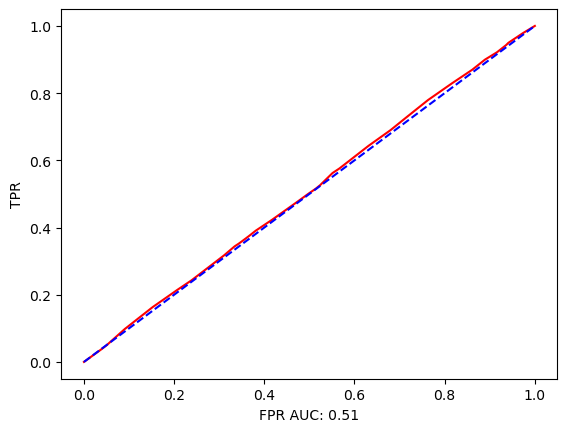

In [173]:
from sklearn.ensemble import StackingClassifier
base_models=[('Log reg',LogisticRegression()),
             ('DT',DecisionTreeClassifier(max_depth=2)),('RF',RandomForestClassifier(n_estimators=100,max_depth=5))]
model_staking=StackingClassifier(estimators=base_models,final_estimator=LogisticRegression(random_state=123),cv=3)
model_staking.fit(x_train,y_train)

y_pred_stack=model_staking.predict(x_test)
score(y_test,y_pred_stack)
roc(y_test,model_staking.predict_proba(x_test)[:,1])

In [175]:
test_set_logit

,const,GENDER,DRIVING_EXPERIENCE,TYPE_OF_VEHICLE
0,1.0,0,0.240305,0.331301
1,1.0,0,0.356873,0.165848
2,1.0,1,0.356873,0.236974
3,1.0,1,0.356873,0.165848
4,1.0,0,0.356873,0.165848
...,...,...,...,...
17710,1.0,1,0.315382,0.165848
17711,1.0,1,0.315382,0.265876
17712,1.0,0,0.240305,0.265876
17713,1.0,1,0.356873,0.236974


In [177]:
x_logit=sma.add_constant(x)

In [184]:
model=sma.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.681774
         Iterations 4


In [185]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                OUTCOME   No. Observations:                87285
Model:                          Logit   Df Residuals:                    87282
Method:                           MLE   Df Model:                            2
Date:                Wed, 28 Dec 2022   Pseudo R-squ.:              -0.0007994
Time:                        15:31:18   Log-Likelihood:                -59509.
converged:                       True   LL-Null:                       -59461.
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
GENDER                 0.0255      0.014      1.820      0.069      -0.002       0.053
DRIVING_EXPERIENCE    -0.4504      0.069     -6.488      0.000      -0.587      -0.314
TYPE_OF_VEHICLE       -0.6710      0.078     -8.567      0.000      -0.824      -0.517
======================================================================================
"""

In [188]:
lr=LogisticRegression(class_weight='balanced', verbose=3, solver='liblinear')

In [190]:
pred=lr.fit(x_train,y_train).predict(x_test)

[LibLinear]

In [191]:
score(y_test,pred)

confusion_matrix 
 [[5457 4616]
 [3851 3533]]
cohen_kappa_score 0.019936525076801104
accuracy 0.5149796643180387
recall 0.47846695557963165
auc_score 0.510106107592258
classification_report 
               precision    recall  f1-score   support

           0       0.59      0.54      0.56     10073
           1       0.43      0.48      0.45      7384

    accuracy                           0.51     17457
   macro avg       0.51      0.51      0.51     17457
weighted avg       0.52      0.51      0.52     17457

f1_score 0.45490246571814846


In [192]:
x_train

,GENDER,DRIVING_EXPERIENCE,TYPE_OF_VEHICLE
21596,0,0.088744,0.237177
7251,0,0.357117,0.329071
59236,0,0.315335,0.165550
78483,0,0.238804,0.329071
4786,1,0.315335,0.329071
...,...,...,...
19708,0,0.238804,0.329071
62488,0,0.315335,0.165550
76841,0,0.357117,0.268202
20080,0,0.238804,0.268202


In [194]:
data.columns

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE'],
      dtype='object')

In [204]:
x[['SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']]=data[['SPEEDING_VIOLATIONS','DUIS', 'PAST_ACCIDENTS']]

In [206]:
sc=StandardScaler()
for i in['SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']:
    x.loc[:,i]=sc.fit_transform(pd.DataFrame(x.loc[:,i]))

In [237]:
x_train_o,x_test_o,y_train_o,y_test_o= train_test_split(x,y,test_size=0.20,stratify=y,random_state=0)

In [238]:
pred=lr.fit(x_train_o,y_train_o).predict(x_test_o)

[LibLinear]

In [239]:
score(y_test_o,pred)

confusion_matrix 
 [[5233 4840]
 [3705 3679]]
cohen_kappa_score 0.017390241921947713
accuracy 0.5105115426476485
recall 0.4982394366197183
auc_score 0.5088735155897162
classification_report 
               precision    recall  f1-score   support

           0       0.59      0.52      0.55     10073
           1       0.43      0.50      0.46      7384

    accuracy                           0.51     17457
   macro avg       0.51      0.51      0.51     17457
weighted avg       0.52      0.51      0.51     17457

f1_score 0.46267999748475125


In [228]:
x

,GENDER,DRIVING_EXPERIENCE,TYPE_OF_VEHICLE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,1,0.357117,0.329071,-0.489222,-0.219868,-0.390988
1,0,0.357117,0.237177,-0.489222,-0.219868,-0.390988
2,0,0.357117,0.268202,-0.489222,-0.219868,-0.390988
3,0,0.357117,0.268202,0.230863,-0.219868,-0.390988
4,1,0.357117,0.268202,-0.489222,-0.219868,0.324561
...,...,...,...,...,...,...
87280,0,0.315335,0.268202,-0.489222,-0.219868,-0.390988
87281,0,0.238804,0.237177,-0.489222,-0.219868,-0.390988
87282,1,0.315335,0.237177,0.950948,-0.219868,-0.390988
87283,0,0.088744,0.329071,-0.489222,-0.219868,-0.390988


In [230]:
data.columns

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE'],
      dtype='object')

In [231]:
x['VEHICLE_YEAR']=data['VEHICLE_YEAR']

In [233]:
x['VEHICLE_YEAR']=pd.get_dummies(x['VEHICLE_YEAR'],drop_first=True)

In [234]:
x

,GENDER,DRIVING_EXPERIENCE,TYPE_OF_VEHICLE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,VEHICLE_YEAR
0,1,0.357117,0.329071,-0.489222,-0.219868,-0.390988,0
1,0,0.357117,0.237177,-0.489222,-0.219868,-0.390988,1
2,0,0.357117,0.268202,-0.489222,-0.219868,-0.390988,1
3,0,0.357117,0.268202,0.230863,-0.219868,-0.390988,1
4,1,0.357117,0.268202,-0.489222,-0.219868,0.324561,0
...,...,...,...,...,...,...,...
87280,0,0.315335,0.268202,-0.489222,-0.219868,-0.390988,1
87281,0,0.238804,0.237177,-0.489222,-0.219868,-0.390988,1
87282,1,0.315335,0.237177,0.950948,-0.219868,-0.390988,1
87283,0,0.088744,0.329071,-0.489222,-0.219868,-0.390988,1


In [236]:
x

,GENDER,DRIVING_EXPERIENCE,TYPE_OF_VEHICLE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,VEHICLE_YEAR
0,1,0.357117,0.329071,-0.489222,-0.219868,-0.390988,0
1,0,0.357117,0.237177,-0.489222,-0.219868,-0.390988,1
2,0,0.357117,0.268202,-0.489222,-0.219868,-0.390988,1
3,0,0.357117,0.268202,0.230863,-0.219868,-0.390988,1
4,1,0.357117,0.268202,-0.489222,-0.219868,0.324561,0
...,...,...,...,...,...,...,...
87280,0,0.315335,0.268202,-0.489222,-0.219868,-0.390988,1
87281,0,0.238804,0.237177,-0.489222,-0.219868,-0.390988,1
87282,1,0.315335,0.237177,0.950948,-0.219868,-0.390988,1
87283,0,0.088744,0.329071,-0.489222,-0.219868,-0.390988,1


In [240]:
x_train_v,x_test_v,y_train_v,y_test_v= train_test_split(x,y,test_size=0.20, stratify=y,random_state=0)

In [241]:
pred=lr.fit(x_train_v,y_train_v).predict(x_test_v)

[LibLinear]

In [242]:
score(y_test_v,pred)

confusion_matrix 
 [[5233 4840]
 [3705 3679]]
cohen_kappa_score 0.017390241921947713
accuracy 0.5105115426476485
recall 0.4982394366197183
auc_score 0.5088735155897162
classification_report 
               precision    recall  f1-score   support

           0       0.59      0.52      0.55     10073
           1       0.43      0.50      0.46      7384

    accuracy                           0.51     17457
   macro avg       0.51      0.51      0.51     17457
weighted avg       0.52      0.51      0.51     17457

f1_score 0.46267999748475125


In [244]:
from sklearn.feature_selection import RFE

In [245]:
rfe=RFE(estimator=LogisticRegression(), n_features_to_select=3)

In [251]:
rfe.fit(x,y)

RFE(estimator=LogisticRegression(), n_features_to_select=3)

In [248]:
x

,GENDER,DRIVING_EXPERIENCE,TYPE_OF_VEHICLE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,VEHICLE_YEAR
0,1,0.357117,0.329071,-0.489222,-0.219868,-0.390988,0
1,0,0.357117,0.237177,-0.489222,-0.219868,-0.390988,1
2,0,0.357117,0.268202,-0.489222,-0.219868,-0.390988,1
3,0,0.357117,0.268202,0.230863,-0.219868,-0.390988,1
4,1,0.357117,0.268202,-0.489222,-0.219868,0.324561,0
...,...,...,...,...,...,...,...
87280,0,0.315335,0.268202,-0.489222,-0.219868,-0.390988,1
87281,0,0.238804,0.237177,-0.489222,-0.219868,-0.390988,1
87282,1,0.315335,0.237177,0.950948,-0.219868,-0.390988,1
87283,0,0.088744,0.329071,-0.489222,-0.219868,-0.390988,1


In [272]:
dtree_=DecisionTreeClassifier(class_weight= {0: 1, 1: 2.5},
 criterion= 'entropy',
 max_depth= 10,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 5)

In [273]:
pred=dtree.fit(x_train_v,y_train_v).predict(x_test_v)

In [274]:
score(y_test_v,pred)

confusion_matrix 
 [[9262  811]
 [6798  586]]
cohen_kappa_score -0.0012912201425034908
accuracy 0.5641290026923297
recall 0.07936078006500542
auc_score 0.4994242597833217
classification_report 
               precision    recall  f1-score   support

           0       0.58      0.92      0.71     10073
           1       0.42      0.08      0.13      7384

    accuracy                           0.56     17457
   macro avg       0.50      0.50      0.42     17457
weighted avg       0.51      0.56      0.47     17457

f1_score 0.1334699920282428


In [309]:
modelboost=CatBoostClassifier(class_weights={0:1,1:2.5}, learning_rate=0.15)

In [310]:
pred=modelboost.fit(x_train_v,y_train_v).predict(x_test_v)

0:	learn: 0.6807254	total: 28.2ms	remaining: 28.2s
1:	learn: 0.6717359	total: 66.2ms	remaining: 33s
2:	learn: 0.6652866	total: 89.7ms	remaining: 29.8s
3:	learn: 0.6608412	total: 106ms	remaining: 26.3s
4:	learn: 0.6576099	total: 120ms	remaining: 24s
5:	learn: 0.6552330	total: 135ms	remaining: 22.4s
6:	learn: 0.6535121	total: 151ms	remaining: 21.4s
7:	learn: 0.6522711	total: 164ms	remaining: 20.3s
8:	learn: 0.6513582	total: 178ms	remaining: 19.6s
9:	learn: 0.6506548	total: 203ms	remaining: 20.1s
10:	learn: 0.6500970	total: 229ms	remaining: 20.6s
11:	learn: 0.6497323	total: 264ms	remaining: 21.8s
12:	learn: 0.6494842	total: 290ms	remaining: 22s
13:	learn: 0.6493023	total: 315ms	remaining: 22.2s
14:	learn: 0.6491155	total: 344ms	remaining: 22.6s
15:	learn: 0.6489894	total: 372ms	remaining: 22.9s
16:	learn: 0.6489208	total: 387ms	remaining: 22.3s
17:	learn: 0.6488713	total: 402ms	remaining: 21.9s
18:	learn: 0.6487568	total: 436ms	remaining: 22.5s
19:	learn: 0.6487055	total: 468ms	remaining:

In [311]:
score(y_test_v,pred)

confusion_matrix 
 [[ 250 9823]
 [ 163 7221]]
cohen_kappa_score 0.002336136400944988
accuracy 0.4279658589677493
recall 0.9779252437703142
auc_score 0.5013720331826851
classification_report 
               precision    recall  f1-score   support

           0       0.61      0.02      0.05     10073
           1       0.42      0.98      0.59      7384

    accuracy                           0.43     17457
   macro avg       0.51      0.50      0.32     17457
weighted avg       0.53      0.43      0.28     17457

f1_score 0.591206811855248


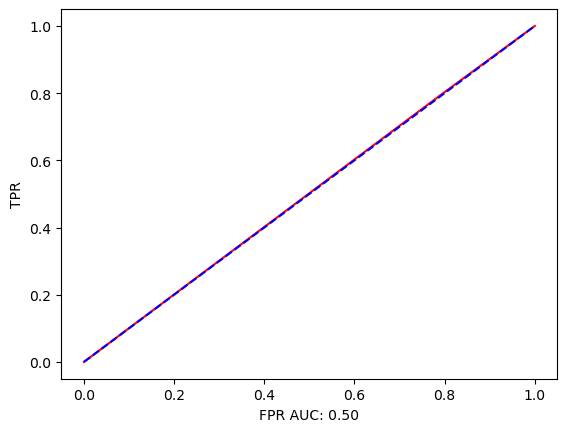

In [308]:
roc(y_test,pred)